Question 1

In [3]:
import torch
from torchvision import datasets, transforms
from matplotlib import pyplot as plt
import torch.nn as nn
import torch.optim as optim

100%|██████████| 26.4M/26.4M [00:04<00:00, 6.52MB/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 140kB/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 2.55MB/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 9.57MB/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw

torch.Size([32, 1, 28, 28]) torch.Size([32])


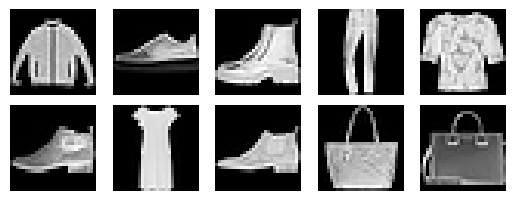

In [7]:
# Define the transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load datasets
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

# Verify dataset loading
batch = next(iter(trainloader))
print(batch[0].shape, batch[1].shape)

# Visualize images
f, ax = plt.subplots(2, 5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)

for i in range(2):
    for j in range(5):
        image, label = next(iter(trainloader))
        ax[i][j].set_axis_off()
        ax[i][j].imshow(image[0,0,:], cmap='gray')

plt.show()

Question 2

In [9]:
# Flatten the data (28x28 -> 784)
input_size = 784
num_classes = 10

# Define different network structures
class MLP(nn.Module):
    def __init__(self, structure, activation):
        super(MLP, self).__init__()
        layers = []
        for i in range(len(structure)-1):
            layers.append(nn.Linear(structure[i], structure[i+1]))
            if i < len(structure)-2:
                if activation == 'relu':
                    layers.append(nn.ReLU())
                elif activation == 'tanh':
                    layers.append(nn.Tanh())
                elif activation == 'sigmoid':
                    layers.append(nn.Sigmoid())
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten the input
        return self.model(x)

def train_and_evaluate(model, trainloader, testloader, epochs=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            running_loss += loss.item()

        train_accuracy = 100 * correct / total

        # Testing accuracy
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in testloader:
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        test_accuracy = 100 * correct / total

        print(f'Epoch {epoch+1}: Train Acc: {train_accuracy:.2f}%, Test Acc: {test_accuracy:.2f}%')

# Different network structures to try
structures = [
    [784, 128, 10],
    [784, 256, 128, 10],
    [784, 512, 256, 128, 10],
    [784, 128, 64, 32, 10],
    [784, 1024, 512, 10]
]

print("Testing different network structures with ReLU activation:")
for structure in structures:
    print(f"\nStructure: {structure}")
    model = MLP(structure, 'relu')
    train_and_evaluate(model, trainloader, testloader)

# Test different activations on best structure
best_structure = [784, 512, 256, 128, 10]  # Replace with your best structure
activations = ['relu', 'tanh', 'sigmoid']

print("\nTesting different activation functions on best structure:")
for activation in activations:
    print(f"\nActivation: {activation}")
    model = MLP(best_structure, activation)
    train_and_evaluate(model, trainloader, testloader)

Testing different network structures with ReLU activation:

Structure: [784, 128, 10]
Epoch 1: Train Acc: 82.46%, Test Acc: 84.47%
Epoch 2: Train Acc: 86.24%, Test Acc: 85.89%
Epoch 3: Train Acc: 87.68%, Test Acc: 86.58%
Epoch 4: Train Acc: 88.37%, Test Acc: 86.75%
Epoch 5: Train Acc: 89.05%, Test Acc: 87.39%
Epoch 6: Train Acc: 89.50%, Test Acc: 87.39%
Epoch 7: Train Acc: 89.96%, Test Acc: 86.94%
Epoch 8: Train Acc: 90.39%, Test Acc: 87.84%
Epoch 9: Train Acc: 90.57%, Test Acc: 87.70%
Epoch 10: Train Acc: 91.02%, Test Acc: 87.91%

Structure: [784, 256, 128, 10]
Epoch 1: Train Acc: 82.15%, Test Acc: 85.48%
Epoch 2: Train Acc: 86.26%, Test Acc: 85.59%
Epoch 3: Train Acc: 88.01%, Test Acc: 86.66%
Epoch 4: Train Acc: 88.64%, Test Acc: 87.10%
Epoch 5: Train Acc: 89.31%, Test Acc: 87.59%
Epoch 6: Train Acc: 89.76%, Test Acc: 87.36%
Epoch 7: Train Acc: 90.19%, Test Acc: 87.39%
Epoch 8: Train Acc: 90.65%, Test Acc: 87.05%
Epoch 9: Train Acc: 91.08%, Test Acc: 88.29%
Epoch 10: Train Acc: 91.31

Question 3

Implementation a-e and some Experimentation

In [14]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Implementation a-e: Baseline CNN
class CNN(nn.Module):
    def __init__(self, dropout_rate=0, num_conv_layers=1):
        super(CNN, self).__init__()

        # Implementation a: First conv layer
        self.conv1 = nn.Conv2d(1, 32, 3)

        # Implementation b: First maxpool
        self.pool = nn.MaxPool2d(2, 2)

        # Experimentation c: Optional second conv layer
        self.num_conv_layers = num_conv_layers
        if num_conv_layers > 1:
            self.conv2 = nn.Conv2d(32, 64, 3)

        # Calculate flattened size
        self.flat_size = 32 * 13 * 13 if num_conv_layers == 1 else 64 * 5 * 5

        # Experimentation b: Dropout layer
        self.dropout = nn.Dropout(dropout_rate)

        # Implementation d: Dense layer with ReLU
        self.fc1 = nn.Linear(self.flat_size, 100)

        # Implementation e: Output layer
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))

        if self.num_conv_layers > 1:
            x = self.pool(torch.relu(self.conv2(x)))

        # Implementation c: Flatten layer
        x = x.view(-1, self.flat_size)

        x = self.dropout(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def train_and_evaluate(model, trainloader, testloader, epochs, lr=0.01, store_metrics=False):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

    train_acc_history = []
    test_acc_history = []

    for epoch in range(epochs):
        # Training
        model.train()
        correct = 0
        total = 0
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_acc = 100 * correct / total

        # Testing
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_acc = 100 * correct / total

        if store_metrics:
            train_acc_history.append(train_acc)
            test_acc_history.append(test_acc)

        if (epoch + 1) % 10 == 0 or epoch == epochs-1:
            print(f'Epoch {epoch+1}: Train Acc: {train_acc:.2f}%, Test Acc: {test_acc:.2f}%')

    if store_metrics:
        return train_acc_history, test_acc_history
    return test_acc

In [15]:
def plot_accuracies(train_acc, test_acc, title):
    plt.figure(figsize=(10, 6))
    epochs = range(10, len(train_acc) * 10 + 1, 10)
    plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, test_acc, 'r-', label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{title}.png')
    plt.close()

In [16]:
# Baseline training (10 epochs)
print("Training baseline CNN for 10 epochs:")
model = CNN()
test_acc = train_and_evaluate(model, trainloader, testloader, epochs=10)
print(f"Final test accuracy: {test_acc:.2f}%")

Training baseline CNN for 10 epochs:
Epoch 10: Train Acc: 96.27%, Test Acc: 90.80%
Final test accuracy: 90.80%


Experimentation a

In [21]:
# Experimentation a: 50 epochs baseline
print("\nTraining CNN for 50 epochs:")
model = CNN()
train_acc, test_acc = train_and_evaluate(model, trainloader, testloader, epochs=50, store_metrics=True)
plot_accuracies(train_acc[::10], test_acc[::10], "Baseline CNN Performance")


Training CNN for 50 epochs:
Epoch 10: Train Acc: 96.32%, Test Acc: 91.15%
Epoch 20: Train Acc: 98.71%, Test Acc: 90.26%
Epoch 30: Train Acc: 99.50%, Test Acc: 90.92%
Epoch 40: Train Acc: 100.00%, Test Acc: 91.76%
Epoch 50: Train Acc: 100.00%, Test Acc: 91.80%


Experimentation b

In [17]:
# Experimentation b: 50 epochs with dropout
print("\nTraining CNN for 50 epochs with dropout:")
model = CNN(dropout_rate=0.5)
train_acc, test_acc = train_and_evaluate(model, trainloader, testloader, epochs=50, store_metrics=True)
plot_accuracies(train_acc[::10], test_acc[::10], "CNN Performance with Dropout")


Training CNN for 50 epochs with dropout:
Epoch 10: Train Acc: 92.78%, Test Acc: 91.29%
Epoch 20: Train Acc: 94.81%, Test Acc: 91.22%
Epoch 30: Train Acc: 95.79%, Test Acc: 91.72%
Epoch 40: Train Acc: 96.21%, Test Acc: 91.63%
Epoch 50: Train Acc: 96.72%, Test Acc: 91.41%


Experimentation c

In [19]:
# Experimentation c: Two conv layers
print("\nTraining CNN with two conv layers:")
model = CNN(dropout_rate=0.5, num_conv_layers=2)
test_acc = train_and_evaluate(model, trainloader, testloader, epochs=10)
print(f"Final test accuracy with two conv layers: {test_acc:.2f}%")


Training CNN with two conv layers:
Epoch 10: Train Acc: 90.89%, Test Acc: 90.72%
Final test accuracy with two conv layers: 90.72%


Experimentation d

In [20]:
# Experimentation d: Different learning rates
print("\nTesting different learning rates:")
for lr in [0.001, 0.1]:
    print(f"\nTraining with learning rate: {lr}")
    model = CNN(dropout_rate=0.5, num_conv_layers=2)
    test_acc = train_and_evaluate(model, trainloader, testloader, epochs=10, lr=lr)
    print(f"Final test accuracy: {test_acc:.2f}%")


Testing different learning rates:

Training with learning rate: 0.001
Epoch 10: Train Acc: 87.39%, Test Acc: 88.23%
Final test accuracy: 88.23%

Training with learning rate: 0.1
Epoch 10: Train Acc: 9.90%, Test Acc: 10.00%
Final test accuracy: 10.00%
